- 코드 참고 : 
    1. http://mons1220.tistory.com/117 
    2. http://mons1220.tistory.com/47 -> 바라바시 알베르트 모델(Barabasi Albert Model), 또는 Preferential attatchment model (PA)  
      
- 논문 참고 : ["Emergence of scaling in random networks", Albert-L ́aszl ́o Barabasi and Reka Albert, SCIENCE, 1999](https://barabasi.com/f/67.pdf)  
----------------------
## 코드 참고 1
### 1. `networkx` package 이용하기 
- n은 성장을 마친 BA모델 노드 개수  
  
- m은 새롭게 추가되는 node와 기존 node들 사이에 생성되는 edge의 개수  

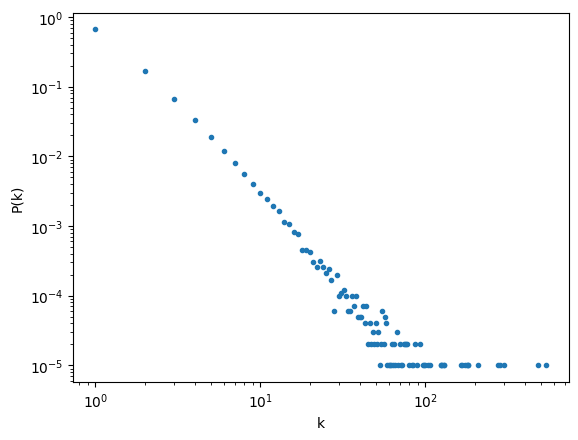

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

""" BA model 생성 """
G = nx.barabasi_albert_graph(n=100000, m=1, seed=3)

""" Graph G의 degree 정보 """
k = dict(nx.degree(G))
""" histogram data 생성 """
y, x = np.histogram(list(k.values()), bins=max(k.values()) - min(k.values()))
x = x[:-1]
y = y.astype('float')
""" y축 normalizing """
y /= np.sum(y)
plt.plot(x, y, ls='', marker='.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show(block=False)

### 2. 직접 설계

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


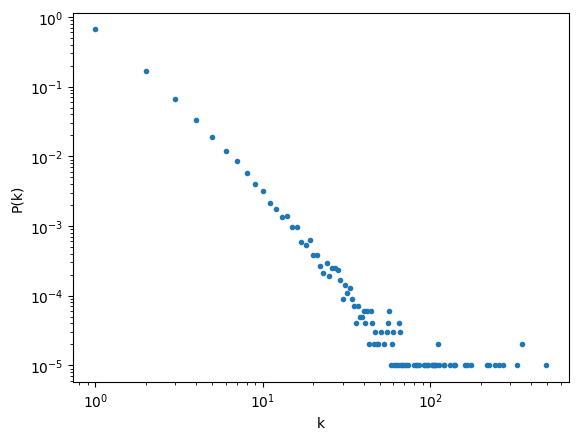

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class BA_model():

    def __init__(self, n=1000, m=1, seed=3):
        self.m = m
        self.n = n
        self.seed = seed

        """"""""""""" initialize seed condition """""""""
        self.nodes = list(range(seed))
        self.N = len(self.nodes)    # nodes 개수
        """ make ring graph """
        """ 인접 node 리스트: adjlist[i] = [j, k] -> edge (i, j), (i, k) """
        self.adjlist = [[i-1, i+1] for i in range(len(self.nodes))]     # 앞뒤 노드에 edge 생성
        self.adjlist[0][0] = seed - 1     # [-1, 1]의 -1부분을 제일 끝 노드(seed-1)에 연결
        self.adjlist[-1][-1] = 0          # [seed-1, seed]의 seed부분을 제일 앞 노드(0)에 연결

        """ pool 생성 """
        self.pool = self.nodes * 2  # ring graph 이므로 초기조건에서 각 node들의 edge 수는 2
        self.P = len(self.pool)     # pool의 크기


        """"""""""""" Network 성장 """""""""
        for i in range(n-seed):
            if i % 10000 == 0:
                print(i)    # step 표시

            self.nodes.append(self.N)   # node추가

            targets = []  # 신규 node와 연결을 갖는 기존 node 선정

            counter = 0
            while counter < self.m:     # target 수가 m개 선정될 때 까지
                r = np.random.randint(self.P)   # pool 속에서 한개의 target 선정
                if self.pool[r] not in targets:     # pool 속에서 선정한 target이 중복하지 않기 위함
                    counter += 1
                    targets.append(self.pool[r])

            """ pool update """
            self.pool += targets                # target으로 선정된 node들을 pool에 추가
            self.pool += [self.N] * self.m      # 신규노드를 pool에 추가 (신규 node는 m개의 edge를 지니므로 m배)
            self.P += 2 * self.m    # 성장으로 인해 pool의 크기가 2 * m 성장 (= len(targets) + len([self.N] * self.m)

            """ adjlist update """
            for j in targets:
                self.adjlist[j] += [self.N]     # target으로 선정된 node에 신규 node를 친구로 추가
            self.adjlist += [targets]           # 신규 node에 target node를 친구로 추가

            self.N += 1     # node 개수 증가


""" Model 생성 """
a = BA_model(n=100000, m=1, seed=3)

""" Plot """
fig = plt.figure()
k = [len(i) for i in a.adjlist]
y, x = np.histogram(k, bins=int(np.max(k)) - int(np.min(k)))
x = x[:-1]
y = y.astype('float')
y /= np.sum(y)
plt.plot(x, y, ls='', marker='.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.show(block=False)

### 3. 시각화
- 사용 프로그램 : `gephi`, https://gephi.org/users/download/  
  
- 생성한 네트워크를 `gexf` 파일로 출력 -> `networkx` 패키지 사용 

In [3]:
## `networkx` 를 이용하여 만든 그래프는 그대로 출력 가능
import networkx as nx

G = nx.barabasi_albert_graph(n=100000, m=1, seed=3)
nx.write_gexf(G, "n100000_m1_s3.gexf") 

# ## 직접 설계한 모델의 경우, networkx 그래프로 바꾸는 작업 필요 
# """ BA Model 'a' 생성 """
# a = BA_model(n=100000, m=1, seed=3)

# """ networkx Graph 생성"""
# G = nx.Graph()
# G.add_nodes_from(a.nodes)   # G에 'a' 노드추가
# # G 에 'a' edge 추가
# edge_list = []
# for cnt in range(len(a.adjlist)):
#     for friend in a.adjlist[cnt]:
#         edge_list += [(cnt, friend)]
# G.add_edges_from(edge_list) 

# """ gexf 파일 출력"""
# nx.write_gexf(G, "n100000_m1_s3.gexf")

- (자세한 사용 방법은 블로그 참고) : `gephi`의 `open`에서 생성한 `gexf`파일을 열고, 상단의 `Overview` 메뉴를 누른 후, 좌측 하단 `Layout`에서 `ForceAtlas 2`를 골라주고 마음에 들 때 까지 Run  
  
--------------------
## 코드 참고 2 : 휴리스틱의 PA
- `barabasi_albert_graph(n,m)`
- `n` : 몇개의 노드로 이루어진 네트워크 그래프인가?
- `m` : 새로운 노드는 몇개의 노드와 연결관계를 갖게 될 것인가? 
  
$\Rightarrow~$ 확률값에 기반하여 그려지는 그래프이기 때문에, seed 고정하지 않으면 매번 다른 그래프 생성

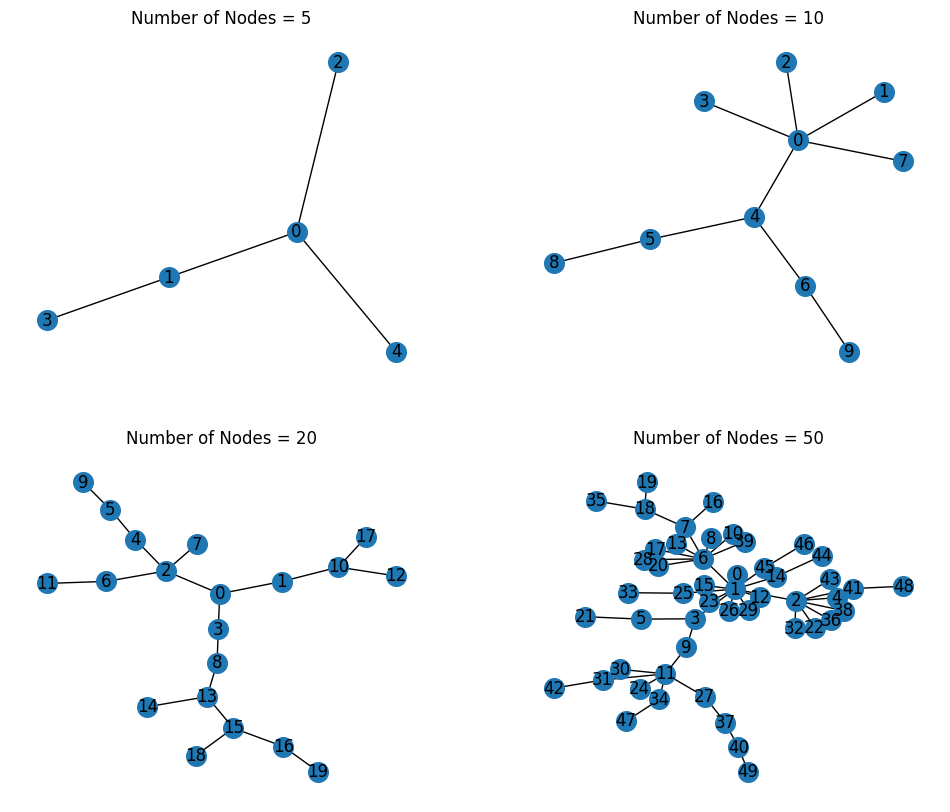

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

n_li = [5,10,20,50]

plt.figure(figsize=(12,10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    G = nx.barabasi_albert_graph(n_li[i], 1)
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200)

    plt.title(f"Number of Nodes = {n_li[i]}")